<a href="https://colab.research.google.com/github/LucasVale98/Formacao_Data_Science/blob/main/Data_Science_an%C3%A1lise_de_s%C3%A9ries_temporais_para_previs%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **01. Entendo o Problema**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/My Drive/datasets/alura_curssos/Data Science análise de séries temporais para previsão'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

**Modelos de séries temporais**

In [ ]:
co2 = pd.read_csv(path + '/co2.csv', delimiter="\t")

In [ ]:
co2.head()

,data,media
0,1980.042,338.45
1,1980.125,339.15
2,1980.208,339.48
3,1980.292,339.87
4,1980.375,340.30


In [ ]:
co2.shape

(477, 2)

In [ ]:
import matplotlib.pyplot as plt

Text(0.5, 0, 'Data')

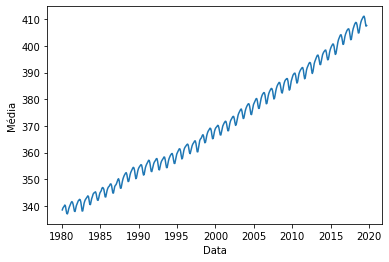

In [ ]:
plt.plot(co2["data"], co2["media"])
plt.ylabel("Média")
plt.xlabel("Data")

In [ ]:
nasc = pd.read_csv(path + '/nascimentos.csv') 

In [ ]:
nasc.head()

,data,n_nasc
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


In [ ]:
nasc.shape

(365, 2)

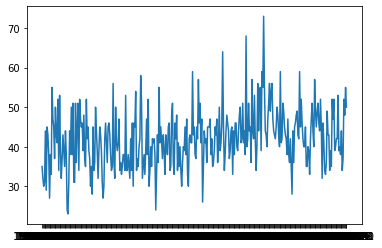

In [ ]:
plt.plot(nasc["data"], nasc["n_nasc"])

In [ ]:
nasc["data"] = pd.to_datetime(nasc["data"])

In [ ]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

Text(0.5, 0, 'Data')

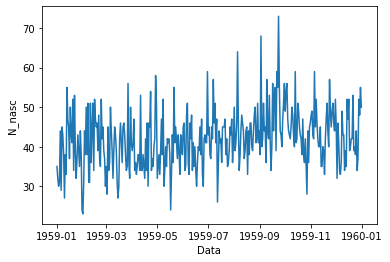

In [ ]:
plt.plot(nasc["data"], nasc["n_nasc"])
plt.ylabel("N_nasc")
plt.xlabel("Data")

**Previsão através da média**

In [ ]:
import numpy as np

In [ ]:
media_carb = co2["media"].mean() 
dt_carb = co2["data"][1] - co2["data"][0] 

Text(0.5, 0, 'data')

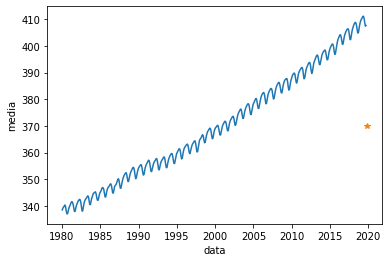

In [ ]:
plt.plot(co2["data"],co2["media"])
plt.plot(co2.iloc[-1,0]+dt_carb,media_carb,"*")
plt.ylabel("media")
plt.xlabel("data")

In [ ]:
media_nasc = nasc["n_nasc"].mean()
dt_nasc = nasc["data"][1] - nasc["data"][0]

Text(0.5, 0, 'Data')

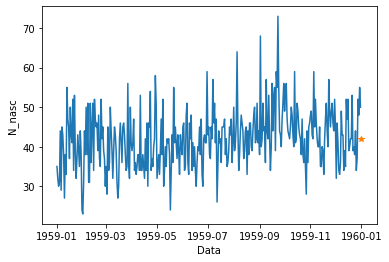

In [ ]:
plt.plot(nasc["data"], nasc["n_nasc"])
plt.plot(nasc.iloc[-1,0] + dt_nasc, media_nasc,"*")
plt.ylabel("N_nasc")
plt.xlabel("Data")

In [ ]:
co2.shape

(477, 2)

In [ ]:
media_tre_pintos_c = co2["media"][474:476].mean()

Text(0.5, 0, 'data')

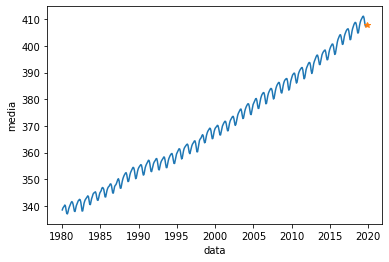

In [ ]:
plt.plot(co2["data"],co2["media"])
plt.plot(co2.iloc[-1,0] + dt_carb, media_tre_pintos_c,"*")
plt.ylabel("media")
plt.xlabel("data")

In [ ]:
nasc.shape

(365, 2)

In [ ]:
media_tres_pontos_n = nasc["n_nasc"][362:364].mean()

Text(0.5, 0, 'Data')

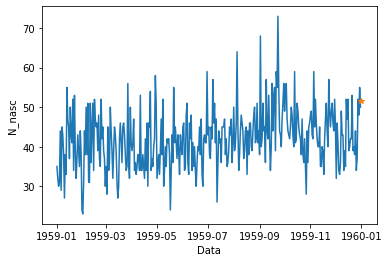

In [ ]:
plt.plot(nasc["data"], nasc["n_nasc"])
plt.plot(nasc.iloc[-1,0] + dt_nasc, media_tres_pontos_n, "*")
plt.ylabel("N_nasc")
plt.xlabel("Data")

# **02. Tratamneto e estacionaridade**

**Media móvel e decomposição**

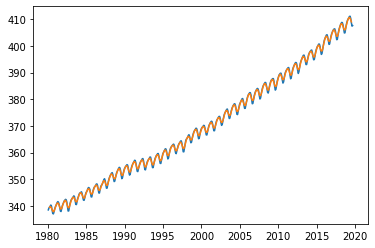

In [ ]:
media_movel_c = co2.rolling(5).mean()

plt.plot(co2["data"],co2["media"])
plt.plot(media_movel_c["data"], media_movel_c["media"])

In [ ]:
media_movel_n = nasc.rolling(5).mean()

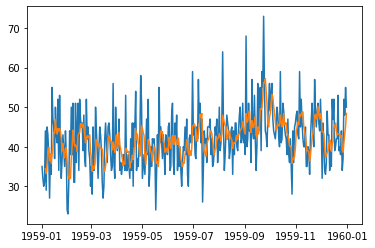

In [ ]:
plt.plot(nasc['data'],nasc['n_nasc'])
plt.plot(nasc['data'], media_movel_n['n_nasc'])

In [ ]:
!pip install statsmodels==v0.11.00rc2

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
result_c = seasonal_decompose(co2.set_index('data'), period=35)

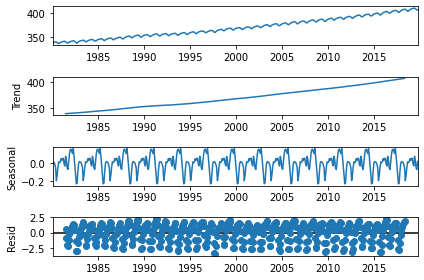

In [ ]:
result_c.plot();

In [ ]:
result_n = seasonal_decompose(nasc.set_index('data'),period=35)

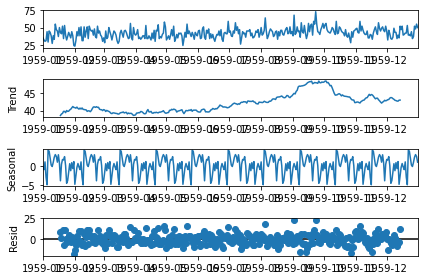

In [ ]:
result_n.plot();

**Estacionariedade**

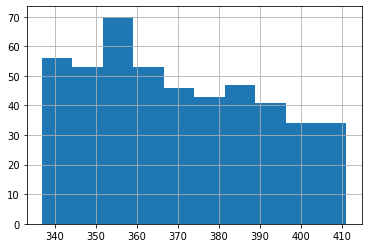

In [ ]:
co2["media"].hist()

In [ ]:
divide = int(len(co2)/2)

In [ ]:
x = co2["media"].values

In [ ]:
c1, c2 = x[0:divide], x[divide:]

In [ ]:
c1.mean()

352.31550420168065

In [ ]:
c2.mean()

387.816359832636

In [ ]:
c1.var()

73.90219533401597

In [ ]:
c2.var()

151.542490933282

In [ ]:
divide = int(len(nasc)/2)

In [ ]:
x = nasc["n_nasc"].values 

In [ ]:
n1, n2 = x[0:divide], x[divide:]

In [ ]:
n1.mean()

39.76373626373626

In [ ]:
n2.mean()

44.185792349726775

In [ ]:
n1.var()

49.21341021615746

In [ ]:
n2.var()

48.708650601690096

**Teste ADF**

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
resultado_c = adfuller(co2['media'].values)

In [ ]:
print('Estatistica ADF', resultado_c[0])

Estatistica ADF 3.0368288291670114


In [ ]:
print('p-valor', resultado_c[1])

p-valor 1.0


In [ ]:
resultado_n = adfuller(nasc['n_nasc'].values)

In [ ]:
print('Estatistica ADF', resultado_n[0])

Estatistica ADF -4.808291253559763


In [ ]:
print('p-valor', resultado_n[1])

p-valor 5.243412990149865e-05


# **03. Previsão por suavização**

**Suavização exponencial**

In [ ]:
co2.head()

,data,media
0,1980.042,338.45
1,1980.125,339.15
2,1980.208,339.48
3,1980.292,339.87
4,1980.375,340.30


In [ ]:
co2 = co2.set_index('data')

co2

,media
data,
1980.042,338.45
1980.125,339.15
1980.208,339.48
1980.292,339.87
1980.375,340.30
...,...
2019.375,411.16
2019.458,410.35
2019.542,408.69


In [ ]:
co2_treino = co2[1980.042:2015]

co2_teste = co2[2015:]

In [ ]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [ ]:
modelo_ajustado = SimpleExpSmoothing(co2_treino).fit(smoothing_level=0.5)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [ ]:
co2_teste.shape

(57, 1)

In [ ]:
modelo_previsto = modelo_ajustado.forecast(57)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


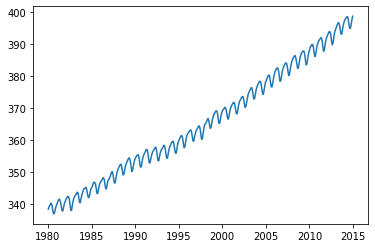

In [ ]:
plt.plot(co2_treino)

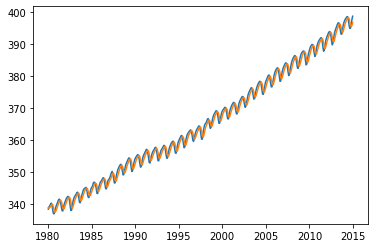

In [ ]:
plt.plot(co2_treino)
plt.plot(co2_treino.index,modelo_ajustado.fittedvalues.values)

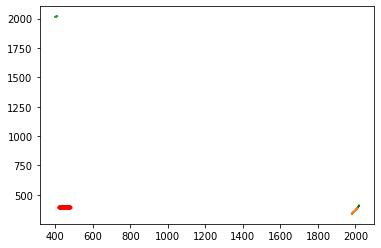

In [ ]:
plt.plot(co2_treino)
plt.plot(co2_treino.index, modelo_ajustado.fittedvalues.values)
plt.plot(co2_teste, 'g')
plt.plot(co2_teste, co2_teste.index, modelo_previsto, 'r.')

In [ ]:
nasc = nasc.set_index("data")

In [ ]:
nasc_treino = nasc["1959-01-01":"1959-12-01"]

In [ ]:
nasc_teste = nasc["1959-12-01":]

In [ ]:
modelo_ajustado = SimpleExpSmoothing(nasc).fit(smoothing_level=0.5)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [ ]:
nasc_teste.shape

(31, 1)

In [ ]:
modelo_previsto = modelo_ajustado.forecast(31)

ValueError: ignored

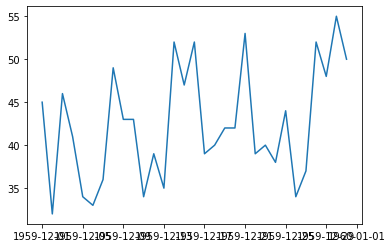

In [ ]:
plt.plot(nasc_treino)
plt.plot(nasc_treino.index, modelo_ajustado.fittedvalues.values)
plt.plot(nasc_teste,'g')
plt.plot(nasc_teste.index,modelo_previsto,'r.')

**HoltWinters**

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing